<a href="https://colab.research.google.com/github/ayushranjan6456/HydrogenPrediction/blob/main/HydrogenPredictionANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/interpolated_merged.csv')

#Drop the unnamed column with index of all 7 cycles individually
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df= df[df['Gas'] != 0]

df

,time,pH,VFA,COD,Gas
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
5,1.206030,5.989551,3.315920,11.308109,0.966157
...,...,...,...,...,...
1395,47.035176,4.947926,4.731427,6.214625,44.151661
1396,47.276382,4.936978,4.742158,6.144786,44.818456
1397,47.517588,4.925355,4.753809,6.072439,45.514966
1398,47.758794,4.913037,4.766412,5.997529,46.241908


In [24]:
from sklearn.model_selection import train_test_split

TargetVariable=['Gas']
Predictors=['time', 'pH', 'VFA', 'COD']

x=df[Predictors].values
y=df[TargetVariable].values


#Replace 0 in y_test with small value to avoid divide by 0 error
# y[y == 0] = 0.01

In [25]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

x=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)


In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1044, 4)
(1044, 1)
(349, 4)
(349, 1)


In [27]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=20, input_dim=4, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#model.add(Dense(units=2, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)


Epoch 1/50
53/53 [==============================] - 1s 2ms/step - loss: 0.7736
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 9/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 10/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 11/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 12/50
53/53 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 13/50
53/53 [==============================

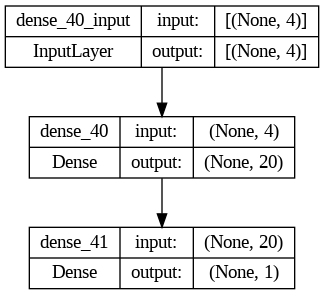

In [28]:

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0041


0.004112075082957745

In [30]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=20, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            #model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
            #Replace 0 in y_test with small value to avoid divide by 0 error
            # y_test[y_test == 0] = 0.01

            Abs_err = y_test - model.predict(X_test)

            err = (y_test - model.predict(X_test))/y_test

            abs_err = np.abs(err)

            MAPE = np.mean(abs_err) * 100
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 78.72237535133794
11/11 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 86.14548317158476
11/11 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 85.7580518274836
11/11 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 89.2685794394938
11/11 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 68.73329741865093
11/11 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 82.60716958314389
11/11 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 83.10881785132497
11/11 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 87.08958453082846
11/11 [===============

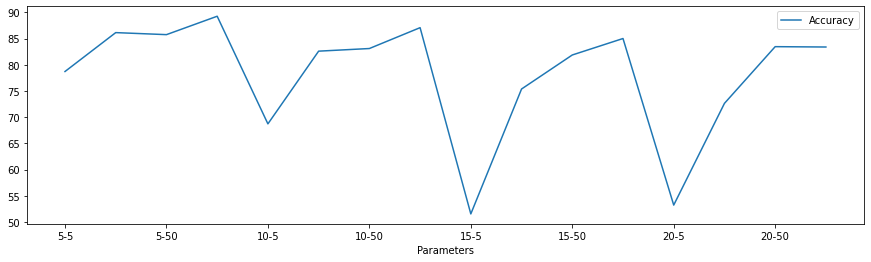

In [31]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [32]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 100, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Gas data back to original gas scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Gas data back to original gas scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)


TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Gas']=y_test_orig
TestingData['PredictedGas']=Predictions
TestingData.head()

11/11 [==============================] - 0s 2ms/step


,time,pH,VFA,COD,Gas,PredictedGas
0,29.909548,5.377574,4.308308,8.439824,28.198308,28.494350
1,26.773869,5.570751,4.059875,8.840587,23.980526,24.306795
2,43.899497,5.020949,4.658255,6.927111,39.087355,40.292988
3,31.115578,5.261608,4.386455,8.203876,30.231761,30.734592
4,9.648241,5.898612,3.523681,10.710354,10.554546,10.358214


In [33]:
# Computing the absolute percent error
import numpy
import sys


APE=100*(abs(TestingData['Gas']-TestingData['PredictedGas'])/TestingData['Gas'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100 - np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 96.81678169063915


,time,pH,VFA,COD,Gas,PredictedGas,APE
0,29.909548,5.377574,4.308308,8.439824,28.198308,28.494350,1.049859
1,26.773869,5.570751,4.059875,8.840587,23.980526,24.306795,1.360559
2,43.899497,5.020949,4.658255,6.927111,39.087355,40.292988,3.084457
3,31.115578,5.261608,4.386455,8.203876,30.231761,30.734592,1.663257
4,9.648241,5.898612,3.523681,10.710354,10.554546,10.358214,1.860161


In [36]:
# TestingData['APE'].plot(x='Parameters', y='APE', figsize=(15,4), kind='line')

In [35]:
TestingData['APE'][290:300]

290    2.571808
291    7.359162
292    1.376886
293    2.755952
294    0.140598
295    0.412753
296    1.973996
297    0.394509
298    0.108405
299    1.977813
Name: APE, dtype: float64

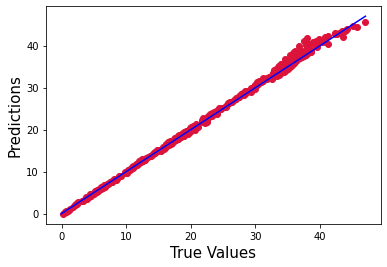

In [39]:

plt.scatter(TestingData['Gas'], TestingData['PredictedGas'], c='crimson')

p1 = max(max(TestingData['PredictedGas']), max(TestingData['Gas']))
p2 = min(min(TestingData['PredictedGas']), min(TestingData['Gas']))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

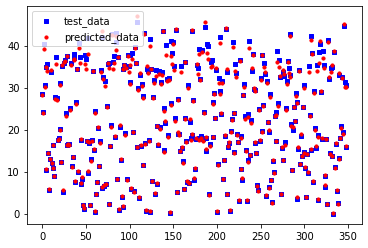

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(111)



ax1.scatter(np.arange(349), TestingData['PredictedGas'], s=10, c='b', marker="s", label='test_data')
ax1.scatter(np.arange(349), TestingData['Gas'], s=10, c='r', marker="o", label='predicted_data')
plt.legend(loc='upper left')
plt.show()

44/44 [==============================] - 0s 1ms/step


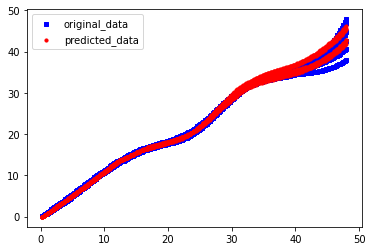

In [54]:
FullPredictions=model.predict(x)

# Scaling the predicted Gas data back to original gas scale
FullPredictions=TargetVarScalerFit.inverse_transform(FullPredictions)





x_plot=df['time']
y1_plot =df['Gas']
y2_plot = FullPredictions

# print(x_plot.size, y1_plot.size, y2_plot.size)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y1_plot, s=10, c='b', marker="s", label='original_data')
ax1.scatter(x_plot, y2_plot, s=10, c='r', marker="o", label='predicted_data')
plt.legend(loc='upper left')
plt.show()
